In [1]:
import quasar as qs
import numpy as np
import pandas as pd
import timeit
import csv
import matplotlib.pyplot as plt
import lqac5 as lq
import lqac501 as lq501
import math
%matplotlib inline

In [2]:
lqac=np.load('LQAC5_2obj.npy')
lqac501=np.load('LQAC501.obj.npy')

In [4]:
print(len(lqac))
print(len(lqac501))
print(lqac[6].pma_err)

592831
592831
0.778


In [19]:
diff_alpha=[]
diff_delta=[]
mean_dalpha=0
mean_ddelta=0
std_alpha=0
std_delta=0

for q in lqac501:
    if(q.source=="GAIA"):
        if(q.alpha_dr2!=0):
            diff_alpha.append((q.alpha_src-q.alpha_dr2)*math.cos(q.delta_src))
        if(q.delta_dr2!=0):
            diff_delta.append((q.delta_src-q.delta_dr2))

mean_dalpha=np.mean(diff_alpha)
mean_ddelta=np.mean(diff_delta)
std_delta=np.std(diff_delta)
std_alpha=np.std(diff_alpha)

In [20]:
print(mean_dalpha)
print(mean_ddelta)
print(std_alpha)
print(std_delta)

1.63324014288e-09
9.17358536789e-05
2.76661665234e-06
0.0293743733658


In [7]:
Q_100z=[]
Q_100G=[]

Q_100z=sorted(lqac,key=lambda x: x.redshift, reverse=True)
Q_100G=sorted(lqac,key=lambda x: x.G, reverse=False)
pma_G=[]
pma_Z=[]
pma_err_G=[]
pma_err_Z=[]


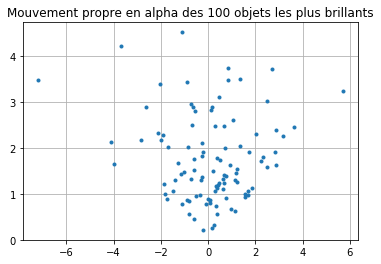

In [8]:
for q in Q_100G:
    if(q.pma!="*******" and q.pma_err!="*******" and q.G!=100):
        if(float(q.pma)!=100):
            pma_G.append(float(q.pma))
            pma_err_G.append(float(q.pma_err))


plt.figure()
plt.plot(pma_G[0:100] ,pma_err_G[0:100],linestyle='None', marker='.')
plt.grid()
plt.title('Mouvement propre en alpha des 100 objets les plus brillants')

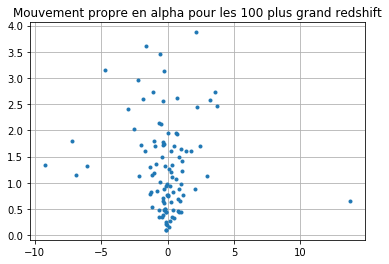

In [9]:

for q in Q_100z:
    if(q.pma!="*******" and q.pma_err!="*******" and q.redshift!=100):
        if(float(q.pma)!=100):
            pma_Z.append(float(q.pma))
            pma_err_Z.append(float(q.pma_err))

plt.figure()
plt.plot(pma_Z[0:100] ,pma_err_Z[0:100],linestyle='None', marker='.')
plt.title('Mouvement propre en alpha pour les 100 plus grand redshift')
plt.grid()

In [10]:
print(len(pma_err_G))
print(len(pma_G))

print(len(pma_err_Z))
print(len(pma_Z))

319905
319905
319905
319905


In [11]:
from scipy.stats import linregress
pente_Z, ordonne_Z, r_value, p_value, std_err=linregress(pma_Z[0:100] ,pma_err_Z[0:100] )
print(pente_Z,ordonne_Z)

pente_G, ordonne_G, r_value, p_value, std_err=linregress(pma_G[0:100] ,pma_err_G[0:100] )
print(pente_G,ordonne_G)

-0.0314027589986 1.29278337521
-0.0367926311783 1.77880363029


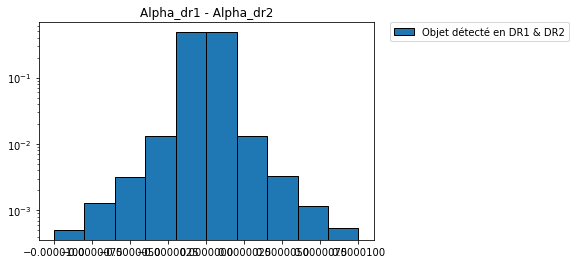

In [21]:
weights=np.ones_like(diff_alpha)/float(len(diff_alpha))
weights_2=np.ones_like(diff_delta)/float(len(diff_delta))
plt.figure()
plt.hist(diff_alpha,range=(-0.00001,0.00001), label='Objet détecté en DR1 & DR2', edgecolor='black',weights=weights,log=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Alpha_dr1 - Alpha_dr2')

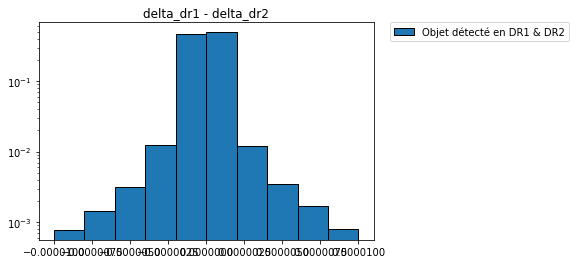

In [22]:

plt.figure()
plt.hist(diff_delta,range=(-0.00001,0.00001), label='Objet détecté en DR1 & DR2', edgecolor='black',weights=weights_2,log=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('delta_dr1 - delta_dr2')

In [23]:
pma=[]
pmd=[]
pmtot=[]
for q in lqac:
    if(q.pma!='*******' and q.pma_err!="*******"):
        if(float(q.pma)!=100):
            pma.append(float(q.pma))
            pmd.append(float(q.pmd))
            pmtot.append(math.sqrt(float(q.pma)*float(q.pma)+float(q.pmd)*float(q.pmd)))


83.778 -268.324
62.44 -101.898
282.0526982693128 0.0036055512754639895


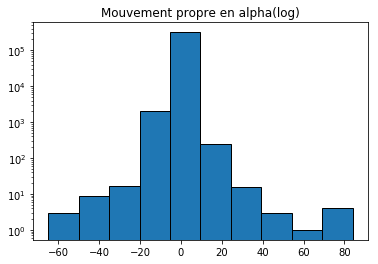

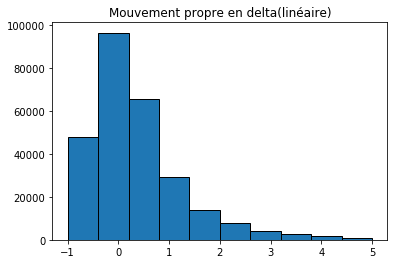

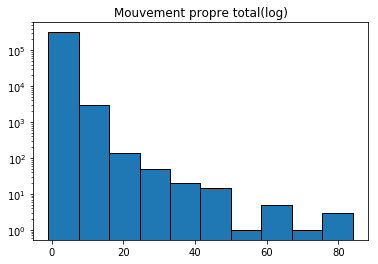

In [24]:
print(max(pma), min(pma))
print(max(pmd), min(pmd))
print(max(pmtot), min(pmtot))
pma_w=np.ones_like(pma)/float(len(pma))
pmd_w=np.ones_like(pmd)/float(len(pmd))
pmtot_w=np.ones_like(pmtot)/float(len(pmtot))
plt.figure()
plt.hist(pma, edgecolor='black', range=(-65,84),log=True)
plt.title('Mouvement propre en alpha(log)')

plt.figure()
plt.hist(pmd, edgecolor='black', range=(-1,5))
plt.title('Mouvement propre en delta(linéaire)')

plt.figure()
plt.hist(pmtot, edgecolor='black', range=(-1,84),log=True)
plt.title('Mouvement propre total(log)')

In [32]:
incert_a1=[]
incert_a2=[]
incert_d1=[]
incert_d2=[]

for q in lqac501:
    if(q.source=="GAIA"):
        if(q.alpha_dr2!=0 and q.delta_dr2!=0):
            incert_a1.append(q.a_err)
            incert_a2.append(float(q.alpha_dr2_err))
            incert_d1.append(q.d_err)
            incert_d2.append(float(q.delta_dr2_err))
            if(q.d_err>90):
                print(q)

print(len(incert_a1),len(incert_a2),len(incert_d1),len(incert_d2))



LQAC_051-001_006
LQAC_131+048_070
LQAC_135+033_029
LQAC_136+046_014
LQAC_142+050_020
LQAC_144+047_014
LQAC_144+056_023
LQAC_146+048_004
LQAC_149+032_023
LQAC_153+034_007
LQAC_155+046_054
LQAC_157+040_002
LQAC_159+041_001
LQAC_159+041_002
LQAC_159+043_024
LQAC_159+009_010
LQAC_159+041_007
LQAC_159+055_020
LQAC_160+046_027
LQAC_162+052_031
LQAC_164+043_004
LQAC_165+048_015
LQAC_167+035_008
LQAC_167+052_033
LQAC_168+040_011
LQAC_169+045_023
LQAC_170+044_011
LQAC_171+041_004
LQAC_171+034_005
LQAC_171+034_007
LQAC_173+031_034
LQAC_176+029_036
LQAC_205+033_013
LQAC_213+029_015
LQAC_221+021_026
LQAC_259+031_034
LQAC_336-037_002
LQAC_337-040_001
LQAC_337-039_007
LQAC_337-062_001
LQAC_338-037_004
LQAC_338-037_006
LQAC_340-039_004
LQAC_340-040_005
246054 246054 246054 246054


0.035 98.76
0.01 89.364
0.04 99.19
0.013 90.191


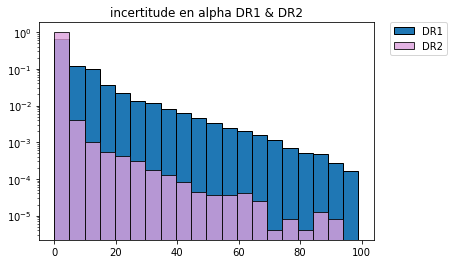

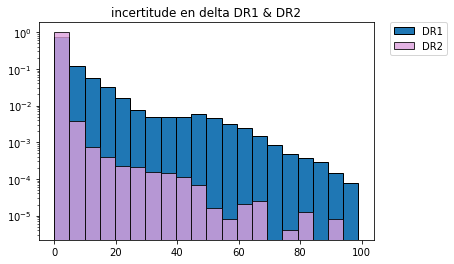

In [54]:
print(min(incert_a1), max(incert_a1))
print(min(incert_a2),max(incert_a2))
print(min(incert_d1),max(incert_d1))
print(min(incert_d2),max(incert_d2))

incert_w=np.ones_like(incert_a1)/float(len(incert_a1))

plt.figure()
plt.hist(incert_a1, edgecolor='black', label='DR1',range=(0,99),bins=20, weights=incert_w,log=True)
plt.hist(incert_a2, edgecolor='black', label='DR2',range=(0,99),bins=20, weights=incert_w,log=True, facecolor='plum', alpha=0.8)
plt.title('incertitude en alpha DR1 & DR2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()
plt.hist(incert_d1, edgecolor='black', label='DR1',range=(0,99),bins=20, weights=incert_w,log=True)
plt.hist(incert_d2, edgecolor='black', label='DR2',range=(0,99),bins=20, weights=incert_w,log=True, facecolor='plum', alpha=0.8)
plt.title('incertitude en delta DR1 & DR2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

44.135 -25.136


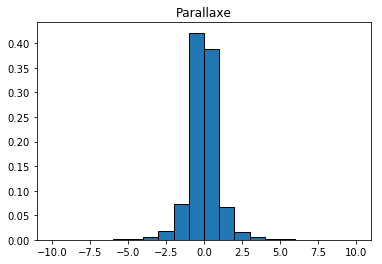

In [36]:
par=[]

for q in lqac:
    if(q.par!=100):
        par.append(q.par)
print(max(par),min(par))
weights=np.ones_like(par)/float(len(par))
plt.figure()
plt.title('Parallaxe')
plt.hist(par, bins=20,range=(-10,10),edgecolor='black',weights=weights)
plt.show()

6.83 24.802


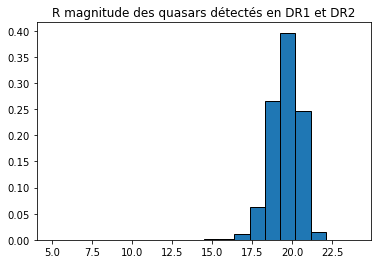

In [38]:
dr12_list=[]
for q in lqac:
    if(q.GAIA=='DR12' and q.r!=0):
        dr12_list.append(q.r)

print(min(dr12_list),max(dr12_list))
weights=np.ones_like(dr12_list)/float(len(dr12_list))
plt.figure()
plt.hist(dr12_list,bins=20,range=(5,24), edgecolor='black',weights=weights)
plt.title('R magnitude des quasars détectés en DR1 et DR2')
plt.show()


0.02435159132377184 268.32401717326763


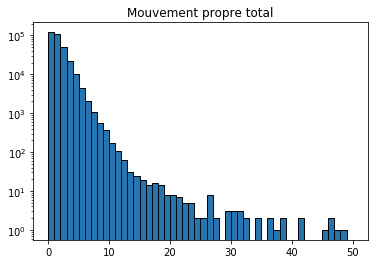

In [41]:
drPMTOT_list=[]
for q in lqac:
    if(float(q.pma)!=100 and float(q.pma_err)!=100):
        drPMTOT_list.append(math.sqrt(float(q.pma)*float(q.pma)+float(q.pma_err)*float(q.pma_err)))

print(min(drPMTOT_list),max(drPMTOT_list))
weights=np.ones_like(drPMTOT_list)/float(len(drPMTOT_list))
plt.figure()
plt.hist(drPMTOT_list,range=(0,50),bins=50, edgecolor='black',log=True)
plt.title('Mouvement propre total')
plt.show()

In [42]:
G_dr1=[]
G_dr2=[]
G_dr1_1=[]
G_dr2_1=[]
diff_G=[]
for q in lqac:
    if(q.GAIA=='DR1'):
        if(q.G!=0):
            G_dr1.append(q.G)
    elif(q.GAIA=='DR2'):
        if(q.G2!=100):
            G_dr2.append(q.G2)
    if(q.GAIA=='DR12'):
        if(q.G!=0):
            G_dr1.append(q.G)
            G_dr1_1.append(q.G)
        if(q.G2!=100):
            G_dr2.append(q.G2)
            G_dr2_1.append(q.G2)
            diff_G.append(q.G2-q.G)

print(min(G_dr1),min(G_dr2))
print(max(G_dr1),max(G_dr2))
print(min(G_dr2_1),min(G_dr1_1))
print(max(G_dr2_1),max(G_dr1_1))


6.253 4.855
21.691 21.922
6.329 6.253
21.673 21.691


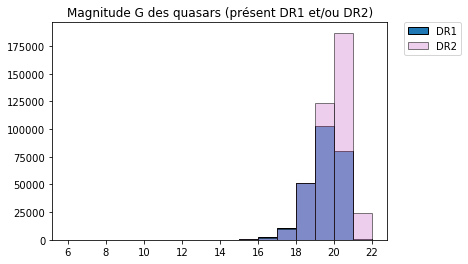

In [44]:
plt.figure()
plt.hist(G_dr1,range=(6,22),bins=16, edgecolor='black',label='DR1')
plt.hist(G_dr2,range=(6,22),bins=16, edgecolor='black',label='DR2',alpha=0.5,facecolor='plum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Magnitude G des quasars (présent DR1 et/ou DR2)')
plt.show()

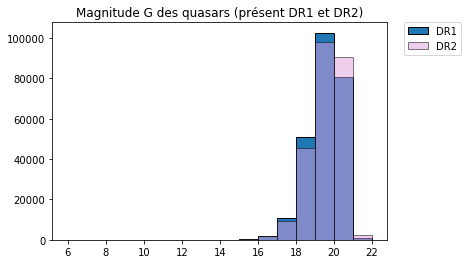

0.0910702997604 0.0964577271728


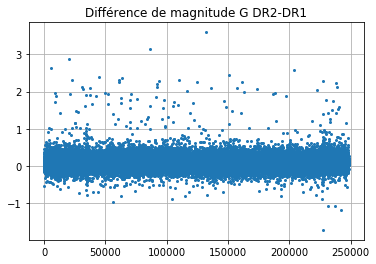

In [48]:
plt.figure()
plt.hist(G_dr1_1,range=(6,22),bins=16, edgecolor='black',label='DR1')
plt.hist(G_dr2_1,range=(6,22),bins=16, edgecolor='black',label='DR2',alpha=0.5, facecolor='plum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Magnitude G des quasars (présent DR1 et DR2)')
plt.show()
print(np.mean(diff_G), np.std(diff_G))
plt.figure()
plt.plot(diff_G,marker='.',linestyle='none',markersize=4)
plt.grid()
plt.title('Différence de magnitude G DR2-DR1')
plt.show()

179474


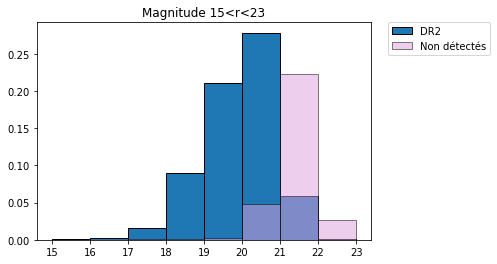

In [51]:
r_NG=[]
r_G=[]
for q in lqac:
    if(q.GAIA=='NONE'):
        if(q.r<23 and q.r>15):
            r_NG.append(q.r)
    elif(q.GAIA=='DR2' or q.GAIA=='DR12'):
        if(q.r<23 and q.r>15):
            r_G.append(q.r)

print(len(r_NG))
weights=np.ones_like(r_G)/float(len(lqac))
weights_ng=np.ones_like(r_NG)/float(len(lqac))
plt.figure()
plt.hist(r_G,range=(15,23),bins=8,edgecolor='black',label='DR2',weights=weights)
plt.hist(r_NG,range=(15,23),bins=8,edgecolor='black',label='Non détectés',alpha=0.5,weights=weights_ng,facecolor='plum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Magnitude 15<r<23')
plt.show()

In [61]:

pma_G=[]
pma_Z=[]
pma_err_G=[]
pma_err_Z=[]
pmd_err_G=[]
pmd_err_Z=[]
pmd_G=[]
pmd_Z=[]

for q in Q_100G:
    if(q.pma!="*******" and q.pma_err!="*******" and q.G!=100):
        if(float(q.pma)!=100):
            pma_G.append(float(q.pma))
            pma_err_G.append(float(q.pma_err))
            pmd_G.append(q.pmd)
            pmd_err_G.append(q.pmd_err)

for q in Q_100z:
    if(q.pma!="*******" and q.pma_err!="*******" and q.redshift!=100):
        if(float(q.pma)!=100 and q.pmd!=100):
            pma_Z.append(float(q.pma))
            pma_err_Z.append(float(q.pma_err))
            pmd_Z.append(q.pmd)
            pmd_err_Z.append(q.pmd_err)



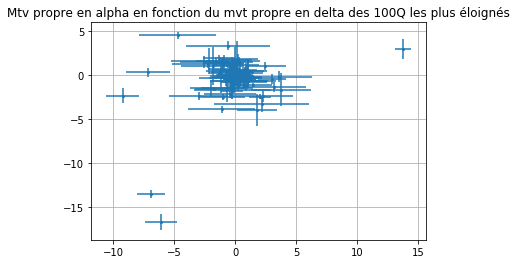

In [64]:
plt.figure()
plt.errorbar(pma_Z[0:100] , pmd_Z[0:100], xerr=pma_err_Z[0:100] , yerr=pmd_err[0:100] , marker='.', linestyle='none', markersize=4)
plt.grid()
plt.title('Mtv propre en alpha en fonction du mvt propre en delta des 100Q les plus éloignés')

plt.show()

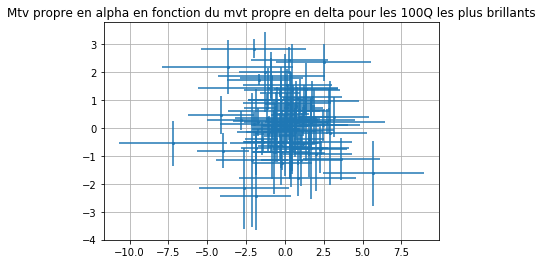

In [65]:
plt.figure()
plt.errorbar(pma_G[0:100] , pmd_G[0:100], xerr=pma_err_G[0:100] , yerr=pmd_err[0:100] , marker='.', linestyle='none', markersize=4)
plt.grid()
plt.title('Mtv propre en alpha en fonction du mvt propre en delta pour les 100Q les plus brillants')
plt.show()